In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import classification_report, roc_curve, auc, roc_auc_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
import joblib

In [2]:
def print_classification_report(y_test, targets, predicao):
    report_rf_Small = classification_report(y_test, predicao, target_names=targets)
    print("Classification Report Random Forest Small:")
    print(report_rf_Small)

def print_confusion_matrix( y_test, targets,predicao):
    matriz_rf_Small = confusion_matrix(y_test, predicao)
    labels_Small = targets

    # Plotar a matriz de confusão usando seaborn
    plt.figure(figsize=(10, 7))
    sns.heatmap(matriz_rf_Small, annot=True, fmt='g', cmap='Blues', xticklabels=labels_Small, yticklabels=labels_Small)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()
    
def print_feature_importance(modelo, nameColums):
    feature_importance_rf_Small = modelo.feature_importances_

    # Plotar importância das features
    plt.figure(figsize=(10, 6))
    sorted_idx = np.argsort(feature_importance_rf_Small)[::-1]
    features = nameColums
    plt.barh(features[sorted_idx], feature_importance_rf_Small[sorted_idx])
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature')
    plt.title('Feature Importance')
    plt.show()

def print_auc_curve(modelo, x_train, y_train, x_test, y_test):
    prob_predict_test = modelo.predict_proba(x_test)
    prob_predict_train = modelo.predict_proba(x_train)
    
    # Certifique-se de acessar corretamente a segunda coluna, que representa a probabilidade da classe positiva
    y_pred_probs_test = prob_predict_test[:, 1]  # Probabilidades da classe positiva
    y_pred_probs_train = prob_predict_train[:, 1]  # Probabilidades da classe positiva
    
    # Agora, calcule as métricas de AUC
    auc_test = roc_auc_score(y_test, y_pred_probs_test)
    auc_train = roc_auc_score(y_train, y_pred_probs_train)
    
    print(f'AUC Test: {auc_test:.4f}')
    print(f'AUC Train: {auc_train:.4f}')

    # Plotando a curva ROC
    fpr_test, tpr_test, _ = roc_curve(y_test, y_pred_probs_test)
    fpr_train, tpr_train, _ = roc_curve(y_train, y_pred_probs_train)
    
    plt.figure(figsize=(8, 6))
    plt.plot(fpr_test, tpr_test, label=f'ROC Test (AUC = {auc_test:.4f})', color='blue')
    plt.plot(fpr_train, tpr_train, label=f'ROC Train (AUC = {auc_train:.4f})', color='green')
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc='lower right')
    plt.show()

def analise_dados_modelo(modelo, x_train, y_train, x_test, y_test, targets, nameColums):
    modelo.fit(x_train, y_train)
    predicao = modelo.predict(x_test)
    
    print_classification_report(y_test, targets, predicao)
    print_confusion_matrix( y_test, targets,predicao)
    print_feature_importance(modelo, nameColums)
    #print_auc_curve(modelo, x_train, y_train, x_test, y_test) APENAS PARA PROBLEMAS BINARIOS

In [ ]:


df = pd.read_csv('dataPersonality.csv')

# Definindo as colunas
continuous_cols = ["Age", "Introversion Score", "Sensing Score", "Thinking Score", "Judging Score"]
categorical_cols = ["Gender","Interest"]
others_cols = ["Education"]
y_target = ["Personality"]

le_gender = LabelEncoder()
le_interest = LabelEncoder()
le_y = LabelEncoder()
scaler = MinMaxScaler()


def preprocess_dataY(df):
    y_processed = pd.DataFrame()
    y_processed['Personality'] = le_y.fit_transform(df['Personality'])
    return y_processed

def preprocess_dataX(df):
    X_processed = pd.DataFrame()

    X_processed[categorical_cols[0]] = le_gender.fit_transform(df[categorical_cols[0]].values)
    X_processed[categorical_cols[1]] = le_interest.fit_transform(df[categorical_cols[1]].values)
    
    normalized_array = scaler.fit_transform(df[continuous_cols])
    X_processed[continuous_cols] = pd.DataFrame(normalized_array, columns=continuous_cols)
    
    X_processed[others_cols] = df[others_cols]
    
    return X_processed

y_processed = preprocess_dataY(df[y_target])
X_processed = preprocess_dataX(df)

X_train, X_test, y_train, y_test = train_test_split(X_processed, y_processed, test_size=0.2, random_state=42)

param_grid = {
    'n_estimators': [50, 100, 150,200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 6],
}

rf_all = RandomForestClassifier(random_state=42)
random = RandomizedSearchCV(rf_all, param_distributions=param_grid, cv=5,n_iter=30, scoring='accuracy',n_jobs=-1)
random.fit(X_train, y_train)



Melhores Parâmetros Encontrados Big:
{'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': 20}


C:\Users\RODRIGO GONÇALVES\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Classification Report Random Forest Small:
              precision    recall  f1-score   support

        ENTP       0.94      0.91      0.93       799
        INTJ       0.93      0.94      0.93      6963
        ENFP       0.93      0.89      0.91       531
        INTP       0.92      0.93      0.93      4989
        INFP       0.82      0.75      0.78       101
        ESFP       0.85      0.84      0.84       981
        INFJ       0.89      0.73      0.80        78
        ISFP       0.84      0.81      0.82       633
        ESTP       0.91      0.91      0.91       611
        ENFJ       0.90      0.91      0.91      4895
        ENTJ       0.92      0.85      0.88       362
        ISTP       0.89      0.91      0.90      3415
        ESTJ       0.87      0.55      0.67        75
        ISTJ       0.82      0.78      0.80       670
        ESFJ       0.83      0.79      0.81        48
        ISFJ       0.84      0.79      0.81       462

    accuracy                         

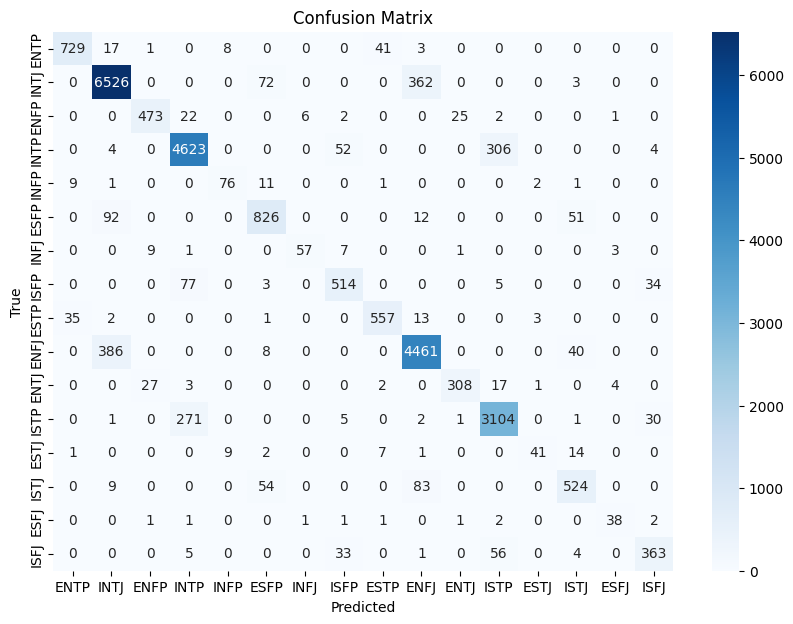

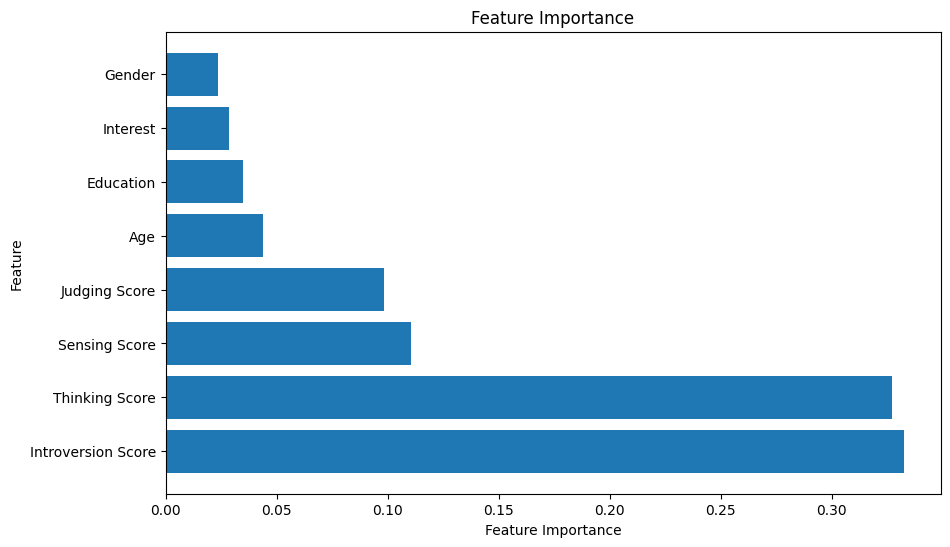

In [12]:
best_rf_all = random.best_estimator_
print("Melhores Parâmetros Encontrados Big:")
print(random.best_params_)

analise_dados_modelo(best_rf_all,
                     X_train,
                     y_train,
                     X_test,
                     y_test,
                     le_y.inverse_transform(y_train["Personality"].unique()),
                     X_train.columns)

In [19]:
joblib.dump(best_rf_all, 'best_rf_classifier_All.pkl')

['best_rf_classifier_All.pkl']

Melhores Parâmetros Encontrados Big:
{'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': 20}


C:\Users\RODRIGO GONÇALVES\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Classification Report Random Forest Small:
              precision    recall  f1-score   support

        ENTP       0.91      0.75      0.82       799
        INTJ       0.87      0.87      0.87      6963
        ENFP       0.84      0.75      0.79       531
        INTP       0.82      0.86      0.84      4989
        INFP       0.81      0.71      0.76       101
        ESFP       0.82      0.77      0.79       981
        INFJ       0.83      0.74      0.78        78
        ISFP       0.73      0.76      0.74       633
        ESTP       0.86      0.75      0.80       611
        ENFJ       0.83      0.84      0.84      4895
        ENTJ       0.83      0.69      0.76       362
        ISTP       0.80      0.84      0.82      3415
        ESTJ       0.80      0.55      0.65        75
        ISTJ       0.78      0.73      0.76       670
        ESFJ       0.78      0.75      0.77        48
        ISFJ       0.73      0.77      0.75       462

    accuracy                         

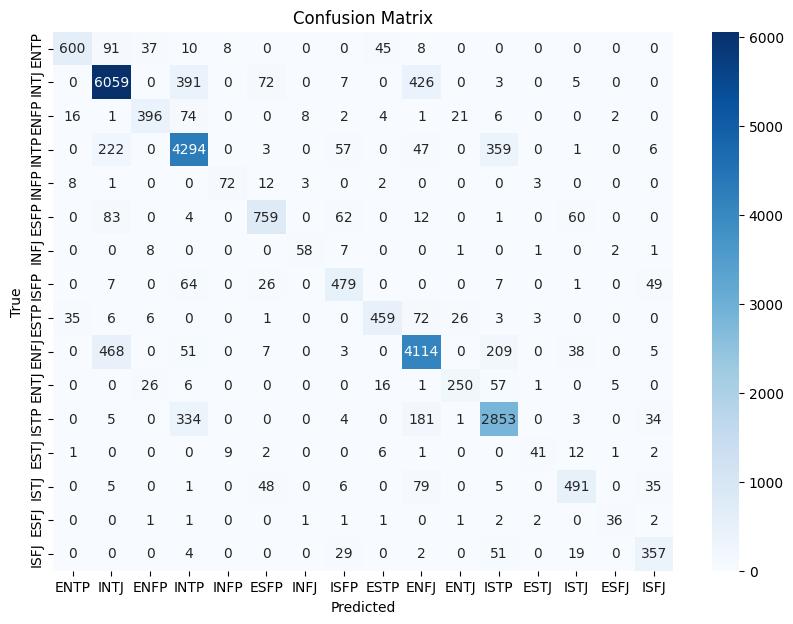

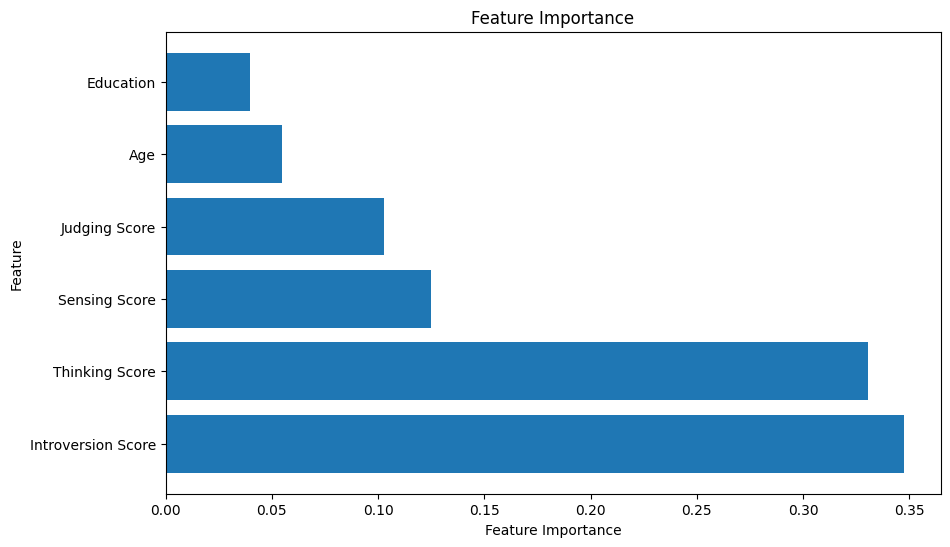

In [18]:
X_processed_2 = X_processed[["Age", "Introversion Score", "Sensing Score", "Thinking Score", "Judging Score", "Education"]]

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_processed_2, y_processed, test_size=0.2, random_state=42)

best_rf_all_2 = random.best_estimator_
print("Melhores Parâmetros Encontrados Big:")
print(random.best_params_)

analise_dados_modelo(best_rf_all_2,
                     X_train_2,
                     y_train_2,
                     X_test_2,
                     y_test_2,
                     le_y.inverse_transform(y_train_2["Personality"].unique()),
                     X_train_2.columns)